In [189]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import r2_score
%matplotlib inline
data=np.genfromtxt("MultipleLR.csv",delimiter=",")
x1=data[:,0]
x0=np.ones((len(data[:,0]),1))
x3=np.zeros((len(data[:,0]),1))
for i in range(10):
    x3[i]=1
y=data[:,3]
y=y.reshape(-1,1)
x = np.column_stack((x0,x3,data[:,0:3]))
print(x)
print(y)


[[  1.   1.  73.  80.  75.]
 [  1.   1.  93.  88.  93.]
 [  1.   1.  89.  91.  90.]
 [  1.   1.  96.  98. 100.]
 [  1.   1.  73.  66.  70.]
 [  1.   1.  53.  46.  55.]
 [  1.   1.  69.  74.  77.]
 [  1.   1.  47.  56.  60.]
 [  1.   1.  87.  79.  90.]
 [  1.   1.  79.  70.  88.]
 [  1.   0.  69.  70.  73.]
 [  1.   0.  70.  65.  74.]
 [  1.   0.  93.  95.  91.]
 [  1.   0.  79.  80.  73.]
 [  1.   0.  70.  73.  78.]
 [  1.   0.  93.  89.  96.]
 [  1.   0.  78.  75.  68.]
 [  1.   0.  81.  90.  93.]
 [  1.   0.  88.  92.  86.]
 [  1.   0.  78.  83.  77.]
 [  1.   0.  82.  86.  90.]
 [  1.   0.  86.  82.  89.]
 [  1.   0.  78.  83.  85.]
 [  1.   0.  76.  83.  71.]
 [  1.   0.  96.  93.  95.]]
[[152.]
 [185.]
 [180.]
 [196.]
 [142.]
 [101.]
 [149.]
 [115.]
 [175.]
 [164.]
 [141.]
 [141.]
 [184.]
 [152.]
 [148.]
 [192.]
 [147.]
 [183.]
 [177.]
 [159.]
 [177.]
 [175.]
 [175.]
 [149.]
 [192.]]


In [190]:
#### mini batch GD #####
def MBGD(x_1,y,theta,alpha,batch_size,max_iterations):
    length=len(y)
    if batch_size>length:
        batch_size=length
    rest=0
    h_theta = x @ theta
    loss_array=[]
    iterations=0
    th=[]
    epochs=[]
    theta0=[]
    theta1=[]
    for i in range(max_iterations):
        if rest>=batch_size:
            u=v
            v+=batch_size
            m=v-u
            rest=length-v
        elif rest==0:
            u=0
            v=batch_size
            m=v-u
            rest=length-v
        elif rest<batch_size:
            u=v
            v+=rest
            m=rest
            rest=0
        h_theta_new=h_theta[u:v,:]
        y_new=y[u:v,:]
        x_new=x[u:v,:]
        lossfunc=(1/(2*m))*(np.sum(( h_theta_new - y_new)**2))
        loss_array.append(lossfunc)
        epochs.append(iterations)
        th.append(theta)
        theta0.append(float((theta[0])))
        theta1.append(float((theta[1])))
        z=h_theta_new-y_new
        gradient_theta=(1/m)*(x_new.T @ z)
        theta-=alpha*gradient_theta
        h_theta = x @ theta
        if iterations>0:
            if np.linalg.norm([gradient_theta])<0.001:
                break
            elif np.absolute(loss_array[iterations]-loss_array[iterations-1])<0.001:
                break
            elif np.absolute(np.linalg.norm([theta0[iterations],theta1[iterations]])- np.linalg.norm([theta0[iterations-1],theta1[iterations-1]]))<0.001:
                break
        iterations+=1
                

        
    return h_theta,theta,loss_array,epochs,theta0,iterations

In [191]:
theta=np.zeros((len(x[0,:]),1))
alpha=0.00005
max_iterations=1000
batch_size=5
h,theta,loss_array,epochs,theta0,iterations=MBGD(x,y,theta,alpha,batch_size,max_iterations)
print("accuracy=",r2_score(y,h)*100,"%")
print("theta",theta)
print("iterations",iterations)

accuracy= 97.19411133729676 %
theta [[0.00760237]
 [0.00799053]
 [0.66556111]
 [0.66603733]
 [0.67041515]]
iterations 2


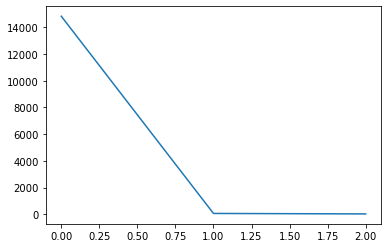

In [192]:
plt.plot(epochs,loss_array)
plt.show()

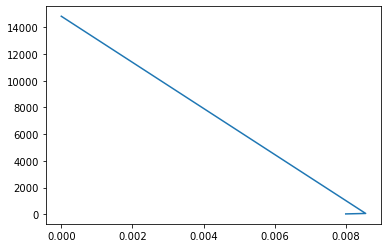

In [193]:
plt.plot(theta0,loss_array)
plt.show()

In [194]:
### momentum mini batch 
def Momentum_MGD(x,y,theta,alpha,gama,batch_size,max_iterations):
    length=len(y)
    if batch_size>length:
        batch_size=length
    rest=0
    v_momentum=np.zeros((len(x[0,:]),1))
    h_theta = x @ theta
    loss_array=[]
    iterations=0
    th=[]
    epochs=[]
    theta0=[]
    theta1=[]
    for i in range(max_iterations):
        if rest>=batch_size:
            u=v
            v+=batch_size
            m=v-u
            rest=length-v
        elif rest==0:
            u=0
            v=batch_size
            m=v-u
            rest=length-v
        elif rest<batch_size:
            u=v
            v+=rest
            m=rest
            rest=0
        h_theta_new=h_theta[u:v,:]
        y_new=y[u:v,:]
        x_new=x[u:v,:]
        lossfunc=(1/(2*m))*(np.sum(( h_theta_new - y_new)**2))
        loss_array.append(lossfunc)
        epochs.append(iterations)
        th.append(theta)
        theta0.append(float((theta[0])))
        theta1.append(float((theta[1])))
        z=h_theta_new-y_new
        gradient_theta=(1/m)*(x_new.T @ z)
        v_momentum=gama*v_momentum+alpha*gradient_theta
        theta-=v_momentum
        h_theta = x @ theta
        if iterations>0:
            if np.linalg.norm([gradient_theta])<0.00001:
                break
            elif np.absolute(loss_array[iterations]-loss_array[iterations-1])<0.00001:
                break
            elif np.absolute(np.linalg.norm([theta0[iterations],theta1[iterations]])- np.linalg.norm([theta0[iterations-1],theta1[iterations-1]]))<0.00001:
                break
        iterations+=1   
    return h_theta,theta,loss_array,epochs,theta0,iterations
    

In [195]:
theta=np.zeros((len(x[0,:]),1))
alpha=0.00001
max_iterations=500
gama=0.9
batch_size=5
h,theta,loss_array,epochs,theta0,iterations=Momentum_MGD(x,y,theta,alpha,gama,batch_size,max_iterations)
print("accuracy=",r2_score(y,h)*100,"%")
print("theta",theta)
print("iterations",iterations)

accuracy= 97.39194082393313 %
theta [[0.00846844]
 [0.01508419]
 [0.63571757]
 [0.60988832]
 [0.75164397]]
iterations 82


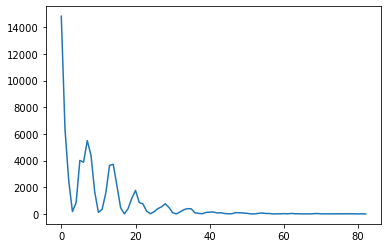

In [196]:
plt.plot(epochs,loss_array)
plt.show()

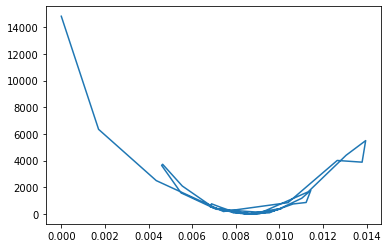

In [197]:
plt.plot(theta0,loss_array)
plt.show()

In [198]:
### Nesterov mini batch 
def Nesterov_MGD(x,y,theta,alpha,gama,batch_size,max_iterations):
    length=len(y)
    if batch_size>length:
        batch_size=length
    rest=0
    v_momentum=np.zeros((len(x[0,:]),1))
    h_theta = x @ theta
    loss_array=[]
    iterations=0
    th=[]
    epochs=[]
    theta0=[]
    theta1=[]
    for i in range(max_iterations):
        if rest>=batch_size:
            u=v
            v+=batch_size
            m=v-u
            rest=length-v
        elif rest==0:
            u=0
            v=batch_size
            m=v-u
            rest=length-v
        elif rest<batch_size:
            u=v
            v+=rest
            m=rest
            rest=0
        h_theta_new=h_theta[u:v,:]
        y_new=y[u:v,:]
        x_new=x[u:v,:]
        lossfunc=(1/(2*m))*(np.sum(( h_theta_new - y_new)**2))
        loss_array.append(lossfunc)
        epochs.append(iterations)
        th.append(theta)
        theta0.append(float((theta[0])))
        theta1.append(float((theta[1])))
        theta_temp=theta - gama*v_momentum
        h_theta=x @ theta_temp
        h_theta_new=h_theta[u:v,:]
        z=h_theta_new- y_new
        gradient_theta_temp=(1/m)*(x_new.T @ z)
        theta=theta_temp-alpha*gradient_theta_temp
        v_momentum=gama*v_momentum+alpha*gradient_theta_temp
        h_theta= x @ theta
        if iterations>0:
            if np.linalg.norm([gradient_theta_temp])<0.00001:
                break
            elif np.absolute(loss_array[iterations]-loss_array[iterations-1])<0.00001:
                break
            elif np.absolute(np.linalg.norm([theta0[iterations],theta1[iterations]])- np.linalg.norm([theta0[iterations-1],theta1[iterations-1]]))<0.00001:
                break
        iterations+=1   
    return h_theta,theta,loss_array,epochs,theta0,iterations
    

In [199]:
theta=np.zeros((len(x[0,:]),1))
alpha=0.00001
max_iterations=500
gama=0.9
batch_size=5
h,theta,loss_array,epochs,theta0,iterations=Nesterov_MGD(x,y,theta,alpha,gama,batch_size,max_iterations)
print("accuracy=",r2_score(y,h)*100,"%")
print("theta",theta)
print("iterations",iterations)

accuracy= 98.01795802225027 %
theta [[0.00852212]
 [0.01595031]
 [0.66491549]
 [0.63823572]
 [0.72645815]]
iterations 36


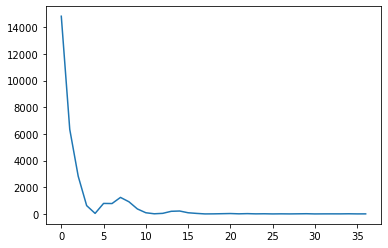

In [200]:
plt.plot(epochs,loss_array)
plt.show()

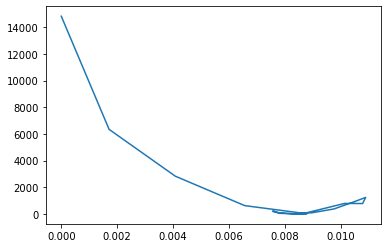

In [201]:
plt.plot(theta0,loss_array)
plt.show()

In [202]:
### adagrad mini batch 
def adagrad_MGD(x,y,theta,alpha,epthlon,batch_size,max_iterations):
    length=len(y)
    if batch_size>length:
        batch_size=length
    rest=0
    v_adagrad=np.zeros((len(x[0,:]),1))
    h_theta = x @ theta
    loss_array=[]
    iterations=0
    th=[]
    epochs=[]
    theta0=[]
    theta1=[]
    for i in range(max_iterations):
        if rest>=batch_size:
            u=v
            v+=batch_size
            m=v-u
            rest=length-v
        elif rest==0:
            u=0
            v=batch_size
            m=v-u
            rest=length-v
        elif rest<batch_size:
            u=v
            v+=rest
            m=rest
            rest=0
        h_theta_new=h_theta[u:v,:]
        y_new=y[u:v,:]
        x_new=x[u:v,:]
        lossfunc=(1/(2*m))*(np.sum(( h_theta_new - y_new)**2))
        loss_array.append(lossfunc)
        epochs.append(iterations)
        th.append(theta)
        theta0.append(float((theta[0])))
        theta1.append(float((theta[1])))
        z=h_theta_new-y_new
        gradient_theta=(1/m)*(x_new.T @ z)
        z=h_theta-y
        gradient_theta=(1/m)*(x.T @ z)
        v_adagrad=v_adagrad+gradient_theta**2
        theta-=(alpha/(np.sqrt(v_adagrad)+epthlon))*gradient_theta
        h_theta= x @ theta 
        if iterations>0:
            if np.linalg.norm([gradient_theta])<0.001:
                break
            elif np.absolute(loss_array[iterations]-loss_array[iterations-1])<0.001:
                break
            elif np.absolute(np.linalg.norm([theta0[iterations],theta1[iterations]])- np.linalg.norm([theta0[iterations-1],theta1[iterations-1]]))<0.001:
                break
        iterations+=1   
    return h_theta,theta,loss_array,epochs,theta0,iterations
    

In [203]:
theta=np.zeros((len(x[0,:]),1))
alpha=0.2
epthlon=np.full((len(x[0,:]),1), 1e-8)
max_iterations=500
batch_size=5
h,theta,loss_array,epochs,theta0,iterations=adagrad_MGD(x,y,theta,alpha,epthlon,batch_size,max_iterations)
print("accuracy=",r2_score(y,h)*100,"%")
print("iterations",iterations)

accuracy= 97.76393462873607 %
iterations 23


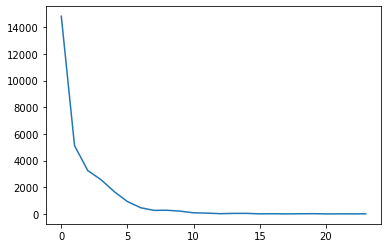

In [204]:
plt.plot(epochs,loss_array)
plt.show()

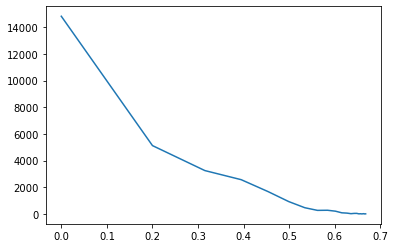

In [205]:
plt.plot(theta0,loss_array)
plt.show()

In [206]:
### RMSprop mini batch 
def RMSprop_MGD(x,y,theta,alpha,epthlon,beta,batch_size,max_iterations):
    length=len(y)
    if batch_size>length:
        batch_size=length
    rest=0
    v_RMS=np.zeros((len(x[0,:]),1))
    h_theta = x @ theta
    loss_array=[]
    iterations=0
    th=[]
    epochs=[]
    theta0=[]
    theta1=[]
    for i in range(max_iterations):
        if rest>=batch_size:
            u=v
            v+=batch_size
            m=v-u
            rest=length-v
        elif rest==0:
            u=0
            v=batch_size
            m=v-u
            rest=length-v
        elif rest<batch_size:
            u=v
            v+=rest
            m=rest
            rest=0
        h_theta_new=h_theta[u:v,:]
        y_new=y[u:v,:]
        x_new=x[u:v,:]
        lossfunc=(1/(2*m))*(np.sum(( h_theta_new - y_new)**2))
        loss_array.append(lossfunc)
        epochs.append(iterations)
        th.append(theta)
        theta0.append(float((theta[0])))
        theta1.append(float((theta[1])))
        z=h_theta_new-y_new
        gradient_theta=(1/m)*(x_new.T @ z)
        v_RMS=beta*v_RMS+(1-beta)*(gradient_theta**2)
        theta-=(alpha/(np.sqrt(v_RMS)+epthlon))*gradient_theta
        h_theta= x @ theta 
        if iterations>0:
            if np.linalg.norm([gradient_theta])<0.001:
                break
            elif np.absolute(loss_array[iterations]-loss_array[iterations-1])<0.001:
                break
            elif np.absolute(np.linalg.norm([theta0[iterations],theta1[iterations]])- np.linalg.norm([theta0[iterations-1],theta1[iterations-1]]))<0.001:
                break
        iterations+=1   
    return h_theta,theta,loss_array,epochs,theta0,iterations
    

In [207]:
theta=np.zeros((len(x[0,:]),1))
alpha=0.2
beta=0.9
epthlon=np.full((len(x[0,:]),1), 1e-8)
max_iterations=10000
batch_size=5
h,theta,loss_array,epochs,theta0,iterations=RMSprop_MGD(x,y,theta,alpha,epthlon,beta,batch_size,max_iterations)
print("accuracy=",r2_score(y,h)*100,"%")
print("iterations",iterations)

accuracy= 97.56978569104099 %
iterations 3


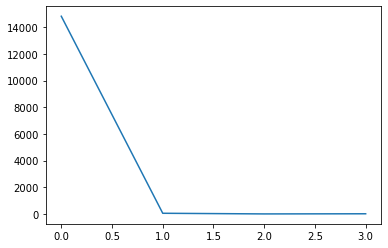

In [208]:
plt.plot(epochs,loss_array)
plt.show()

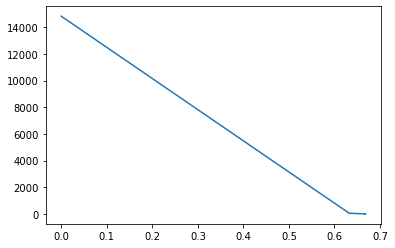

In [209]:
plt.plot(theta0,loss_array)
plt.show()

In [210]:
### ### adam mini batch 
def adam_MGD(x,y,theta,alpha,epthlon,beta,gama,batch_size,max_iterations):
    length=len(y)
    if batch_size>length:
        batch_size=length
    rest=0
    v_adam=np.zeros((len(x[0,:]),1))
    m_adam=np.zeros((len(x[0,:]),1))
    h_theta = x @ theta
    loss_array=[]
    iterations=0
    th=[]
    epochs=[]
    theta0=[]
    theta1=[]
    for i in range(max_iterations):
        if rest>=batch_size:
            u=v
            v+=batch_size
            m=v-u
            rest=length-v
        elif rest==0:
            u=0
            v=batch_size
            m=v-u
            rest=length-v
        elif rest<batch_size:
            u=v
            v+=rest
            m=rest
            rest=0
        h_theta_new=h_theta[u:v,:]
        y_new=y[u:v,:]
        x_new=x[u:v,:]
        lossfunc=(1/(2*m))*(np.sum(( h_theta_new - y_new)**2))
        loss_array.append(lossfunc)
        epochs.append(iterations)
        th.append(theta)
        theta0.append(float((theta[0])))
        theta1.append(float((theta[1])))
        z=h_theta_new-y_new
        gradient_theta=(1/m)*(x_new.T @ z)
        v_adam=beta*v_adam+(1-beta)*gradient_theta**2
        v_adam=v_adam/(1-(beta**(iterations+1)))
        m_adam=gama*m_adam+(1-gama)*gradient_theta
        m_adam=m_adam/(1-(gama**(iterations+1)))
        theta-=(alpha/(np.sqrt(v_adam)+epthlon))*m_adam
        h_theta= x @ theta
        if iterations>0:
            if np.linalg.norm([gradient_theta])<0.001:
                break
            elif np.absolute(loss_array[iterations]-loss_array[iterations-1])<0.001:
                break
            elif np.absolute(np.linalg.norm([theta0[iterations],theta1[iterations]])- np.linalg.norm([theta0[iterations-1],theta1[iterations-1]]))<0.001:
                break
        iterations+=1   
    return h_theta,theta,loss_array,epochs,theta0,iterations
    

In [211]:
theta=np.zeros((len(x[0,:]),1))
alpha=0.5
beta=0.95
gama=0.5
epthlon=np.full((len(x[0,:]),1), 1e-8)
max_iterations=1000
batch_size=5
h,theta,loss_array,epochs,theta0,iterations=adam_MGD(x,y,theta,alpha,epthlon,beta,gama,batch_size,max_iterations)
print("accuracy=",r2_score(y,h)*100,"%")
print("iterations",iterations)

accuracy= 97.42048850487636 %
iterations 6


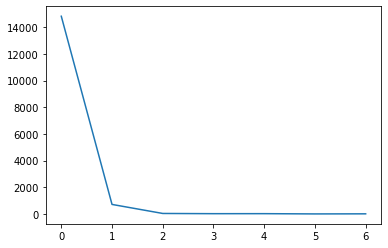

In [212]:
plt.plot(epochs,loss_array)
plt.show()

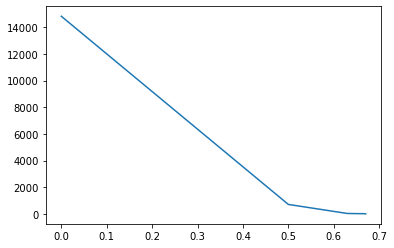

In [213]:
plt.plot(theta0,loss_array)
plt.show()